### Implementing Linear Regression

### sklearn.linear_model.Linear_Regression

#### Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

#### Parameters: 

fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.

copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context.

positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


In [4]:
### Implementation of OLS

### importing libraries

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1,1], [2,3], [3,4], [4, 6]])
y = np.dot(X, np.array([1,2])) + 3
reg = LinearRegression().fit(X,y)
reg.score(X,y)


1.0

In [7]:
reg.coef_

array([1., 2.])

In [8]:
reg.intercept_

2.9999999999999964

In [10]:
reg.predict(np.array([[5,6]]))

array([20.])

In [11]:
reg.get_params(deep = True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

### Implementing Ridge regression

Linear least squares with l2 regularization

Minimizes the objectives function: ||y - Xw||^2_2 + alpha * ||w||^2_2

Parameters:

alpha{float, ndarray of shape (n_targets,)}, default=1.0
Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Ridge object is not advised. Instead, you should use the LinearRegression object.

fit_interceptbool, default=True Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.

copy_Xbool, default=True If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context.

positivebool, default=False When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.



In [18]:
import numpy as np
from sklearn.linear_model import Ridge
ran = np.random.RandomState(0)

number_Of_Samples, number_Of_Features = 10, 5
y = ran.randn(number_Of_Samples)
X = ran.randn(number_Of_Samples, number_Of_Features)

clx = Ridge(alpha = 1.0).fit(X,y)


In [19]:
clx.score(X,y)

0.6836781050289735

In [20]:
Ridge()

Ridge()

In [21]:
clx.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

### Implementing Lasso Regression

Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [22]:
import numpy as np
from sklearn.linear_model import Lasso

rng = np.random.RandomState(0)
number_Of_Samples, number_of_features = 10, 5

X = rng.randn(number_Of_Samples, number_of_features)
y = rng.randn(number_Of_Samples)

clf = Lasso(alpha = 1.0).fit(X,y)

clf.coef_

array([-0.,  0.,  0., -0.,  0.])

In [23]:
clf.intercept_

-0.2427925882379088

In [24]:
print(clf.coef_)

[-0.  0.  0. -0.  0.]


### Implementing ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

a * ||w||_1 + 0.5 * b * ||w||_2^2
where:

alpha = a + b and l1_ratio = a / (a + b)

In [25]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 2, random_state = 0)

regr = ElasticNet(random_state = 0)

regr.fit(X,y)

ElasticNet(random_state=0)

In [26]:
regr.coef_

array([18.83816048, 64.55968825])

In [27]:
regr.score(X,y)

0.8904453086976037

In [28]:
regr.intercept_

1.4512607561654032

In [29]:
regr.predict(np.array([[1,2]]))

array([149.40879773])

### Implementing Logistic Regression

In [30]:
### sklearn.linear_model.LogisticRegression

Parameters:

penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:

'none': no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added.

l1_ratiofloat, default=None
The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X,y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X,y)

clf.predict(X[:2,:])

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [34]:
clf.score(X,y)

0.9733333333333334

In [35]:
clf.coef_

array([[-0.41874027,  0.96699274, -2.52102832, -1.08416599],
       [ 0.53123044, -0.31473365, -0.20002395, -0.94866082],
       [-0.11249017, -0.65225909,  2.72105226,  2.03282681]])

In [38]:
clf.predict_proba(X[:2,:])

array([[9.81802911e-01, 1.81970751e-02, 1.43580537e-08],
       [9.71729527e-01, 2.82704429e-02, 3.00353141e-08]])

### Implementing Naive Bayes

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [40]:
X,y = load_iris(return_X_y=True)
gnr = GaussianNB()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [42]:
y_pred = gnr.fit(X_train, y_train).predict(X_test)

In [43]:
print("Total number of misclassified datapoints out of %d points: %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Total number of misclassified datapoints out of 45 points: 0


### Implementing K-Nearest Neighbor classifier

##### sklearn.neighbors.KNeighborsClassifier

Parameters:

n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.


weights{‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.


algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


leaf_sizeint, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

pint, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.


metricstr or callable, default=’minkowski’
The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. For a list of available metrics, see the documentation of DistanceMetric and the metrics listed in sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS. Note that the “cosine” metric uses cosine_distances. 


metric_paramsdict, default=None
Additional keyword arguments for the metric function.

n_jobsint, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [44]:
X = [[1], [2], [3], [4], [5], [6]]
y = [0,0,0,0,1,1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X,y)



KNeighborsClassifier(n_neighbors=3)

In [46]:
print(neigh.predict([[1.4]]))

[0]


In [47]:
print(neigh.predict([[3.7]]))

[0]


In [48]:
print(neigh.predict([[5.4]]))

[1]


In [52]:
### selecting an optimal k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

error_rate = []
for i in range(1,4):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

min error:- 0.0 at K value:- 0


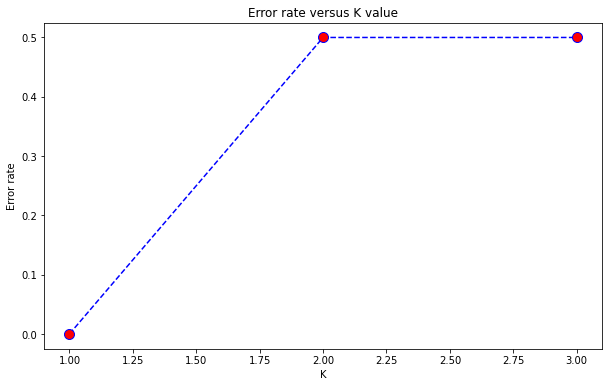

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,4),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate versus K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print("min error:-", min(error_rate),"at K value:-", error_rate.index(min(error_rate)))

### Implementing KFold Crossvalidation

In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

In [57]:
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)

In [58]:
score=cross_val_score(logreg,X,Y,cv=kf)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [59]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


### Implementing Startified K Fold Cross validation

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation score :0.9733333333333334


/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Implementing Monte Carlo Cross validation (shuffle split)

In [61]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [62]:
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

In [63]:
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [64]:
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.97777778 0.95555556 0.97777778 0.95555556 0.91111111 0.93333333
 0.95555556 0.97777778 1.         0.97777778]
Average Cross Validation score :0.9622222222222222


### Implementing timeSeriesSplit

In [65]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [66]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

time_series = TimeSeriesSplit()
print(time_series)

for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]
